# Dissolve

In [2]:
import geopandas
import starepandas
import numpy
import pystare
import matplotlib.pyplot as plt
import datetime
import multiprocessing

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = starepandas.STAREDataFrame(world, add_sids=True, resolution=5, add_trixels=True, n_workers=1)

## Manual merging SIDs
We are extracting all SIDS from the dataframe and merge them in a compressed range

In [13]:
continent = world[world.continent=='South America']
sids = numpy.concatenate(list(continent['sids']))

In [14]:
sids = numpy.unique(sids)
s_range = pystare.to_compressed_range(sids)
sids1 = pystare.expand_intervals(s_range , -1, multi_resolution=True)

In [15]:
# Equivalent to
sids2 = starepandas.compress_sids(sids)

<AxesSubplot:>

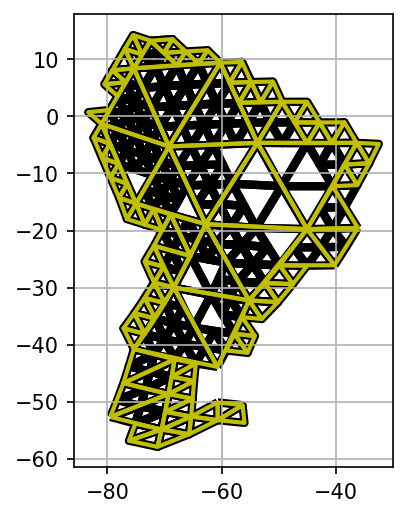

In [16]:
#%matplotlib notebook
fig, ax = plt.subplots(dpi=150)
ax.grid(True)

continent.plot(ax=ax, trixels=True, boundary=True, column='name', zorder=0, linewidth=0.2)
continent.plot(ax=ax, facecolor="none", edgecolor='black', zorder=1, linewidth=4)

df = starepandas.STAREDataFrame(sids=[sids2], add_trixels=True)
df.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=2, linewidth=2)

## High level functions

In [17]:
world.stare_dissolve(by='continent', aggfunc='first', geom=False)

,sids,pop_est,name,iso_a3,gdp_md_est
continent,,,,,
Africa,"[2814749767106565, 4503599627370500, 675539944...",53950935,Tanzania,TZA,150600.0
Antarctica,"[1911778041818775557, 1912340991772196869, 191...",4050,Antarctica,ATA,810.0
Asia,"[288230376151711747, 299489375220137989, 30005...",18556698,Kazakhstan,KAZ,460700.0
Europe,"[648518346341351429, 650207196201615365, 90071...",142257519,Russia,RUS,3745000.0
North America,"[1171498853069750277, 1173187702930014213, 117...",35623680,Canada,CAN,1674000.0
Oceania,"[153122387330596868, 158188936911388677, 16044...",920938,Fiji,FJI,8374.0
Seven seas (open ocean),"[507217908032602117, 508343807939444741]",140,Fr. S. Antarctic Lands,ATF,16.0
South America,"[1807069350482411525, 1807632300435832837, 181...",44293293,Argentina,ARG,879400.0


In [18]:
world.dissolve(by='continent', aggfunc='sum')

,geometry,pop_est,gdp_md_est
continent,,,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...",1219176238,6025295.50
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050,810.00
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868,55434607.77
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461,25284877.00
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112,23505137.00
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...",36782844,1412885.00
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...",140,16.00
South America,"MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...",418540749,6377091.80


## Multiprocessing

### By continent

In [ ]:
start = datetime.datetime.now()
world.stare_dissolve(by='continent', geom=False, n_workers=1)
print(datetime.datetime.now() - start)

In [4]:
start = datetime.datetime.now()
w = world.stare_dissolve(by='continent', geom=False, n_workers=4)
print(datetime.datetime.now() - start)

0:00:12.775822


In [7]:
w.set_trixels(w.make_trixels(n_workers=4), inplace=True)

<AxesSubplot:>

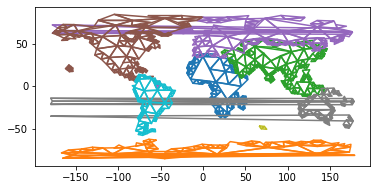

In [15]:
w.reset_index().plot(column='continent')